In [8]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Read the dataset in the csv file from the URL

In [12]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [13]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<Axes: ylabel='MEDV'>

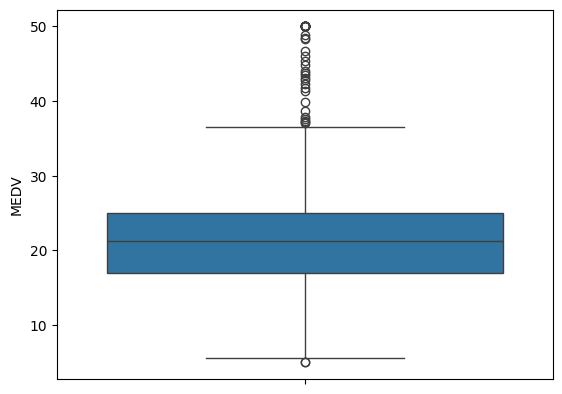

In [14]:
sns.boxplot(boston_df['MEDV'])

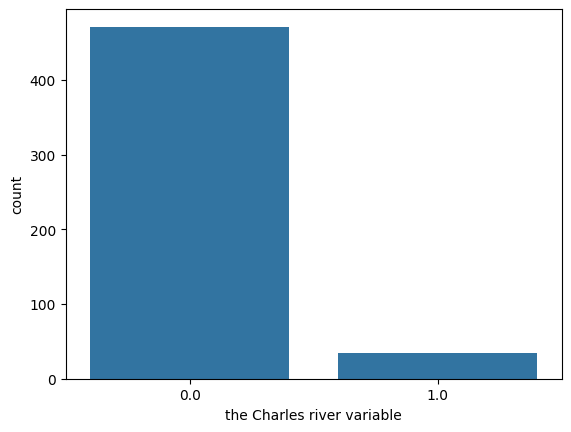

In [15]:
CountStatus = pd.value_counts(boston_df['CHAS'].values)
ax = sns.barplot(CountStatus)
ax.set(xlabel='the Charles river variable')
pyplot.show()

<Axes: xlabel='MEDV', ylabel='age_group'>

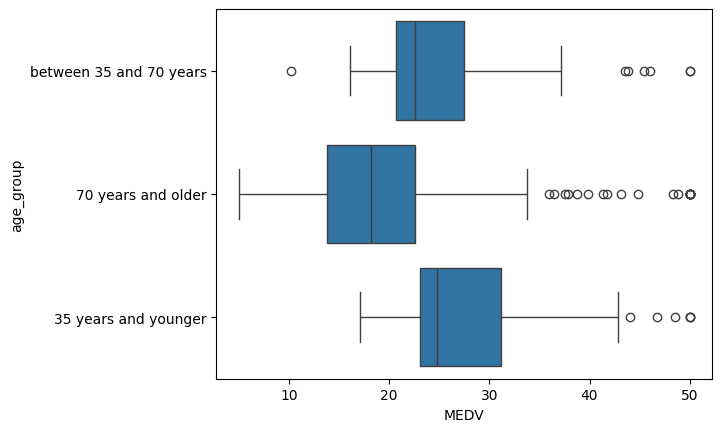

In [16]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
sns.boxplot(x=boston_df['MEDV'],y= boston_df['age_group'])

Text(0, 0.5, 'INDUS')

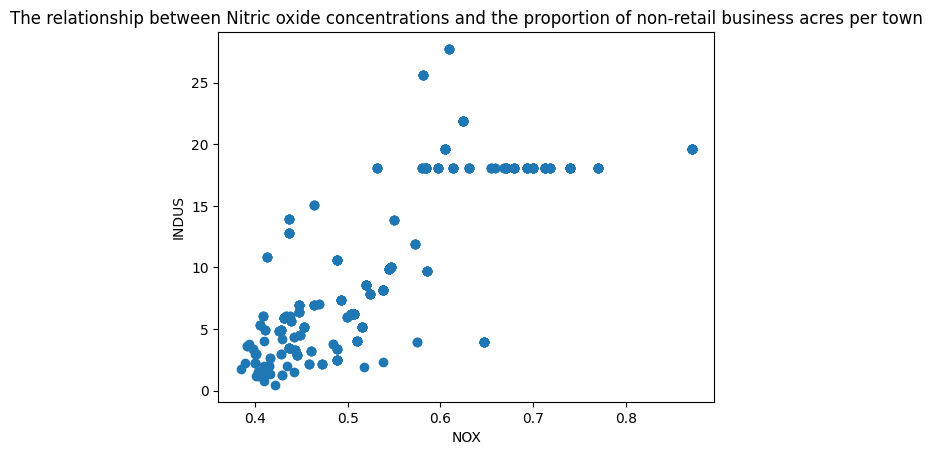

In [17]:
pyplot.scatter(boston_df['NOX'],boston_df['INDUS'])
pyplot.title('The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.xlabel('NOX')
pyplot.ylabel('INDUS')

In [19]:
import numpy as np
# data col 'NOX' can be explained in 76% by data col 'INDUS'
np.corrcoef(boston_df['NOX'],boston_df['INDUS'])

array([[1.        , 0.76365145],
       [0.76365145, 1.        ]])

Text(0.5, 1.0, 'Density of pupil to teacher ratio')

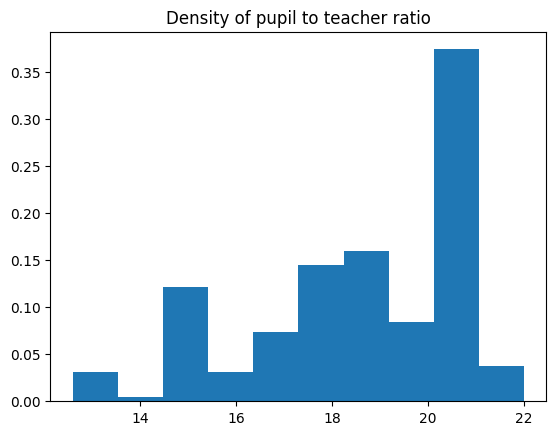

In [13]:
pyplot.hist(boston_df['PTRATIO'],density = True)
pyplot.title('Density of pupil to teacher ratio')

# Task 3

Question: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent)

In [14]:
#H_0 : mu_Charles_river_y == mu_Charles_river_n
#H_a : mu_Charles_river_y != mu_Charles_river_n
#alpha = 0.05
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [17]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

#H_0: mu_1==mu_2==mu_3
#H_1: At least one of the means differ

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

Question: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [16]:
#H_0: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town 
#H_:1 There is correlation between Nitric oxide concentrations and proportion of non-retail business acres per town 
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209156, pvalue=7.913361061235544e-98)

Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between beauty and teaching evaluation score.

Question: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [18]:
# X is the independent variables)
X = boston_df['DIS']
# y is the dependent variable
y = boston_df['MEDV']
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        01:47:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: p < 0.05 there is evidence of correlation between beauty and evaluation scores